In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import collections
import numpy as np

sys.path.append("/private/home/alexandrerame/domainbedv2/")
sys.path.append("/private/home/alexandrerame/slurmconfig/notebook/data")

# sys.path.append("/Users/alexandrerame/code_repository/codedev/domainbedv2")
# sys.path.append("/Users/alexandrerame/code_repository/notebook/data")

In [3]:
from domainbed.codeplot import plot

plot.plt.rcParams["figure.figsize"] = (5, 5)
# plot.plt.rcParams['text.usetex'] = True
# plot.plt.rcParams['font.family'] = 'serif'
# plot.plt.rcParams['font.serif'] = 'Times Roman'

In [4]:
# from oodiidacc.dn_specialized import l as ldn
from oodiidacc.dn_specialized_0117 import l as ldn_0117
from oodiidacc.dn_0117 import l as ldn_inf

from oodiidacc import all_best

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap

# create yellow colormaps
N = 256
yellow = np.ones((N, 4))
yellow[:, 0] = np.linspace(1, 255 / 256, N)  # R = 255
yellow[:, 1] = np.linspace(1, 232 / 256, N)  # G = 232
yellow[:, 2] = np.linspace(1, 11 / 256, N)  # B = 11
yellow_cmp = ListedColormap(yellow)

/private/home/alexandrerame/.conda/envs/pytorch/lib/python3.7/site-packages/matplotlib/figure.py:448: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


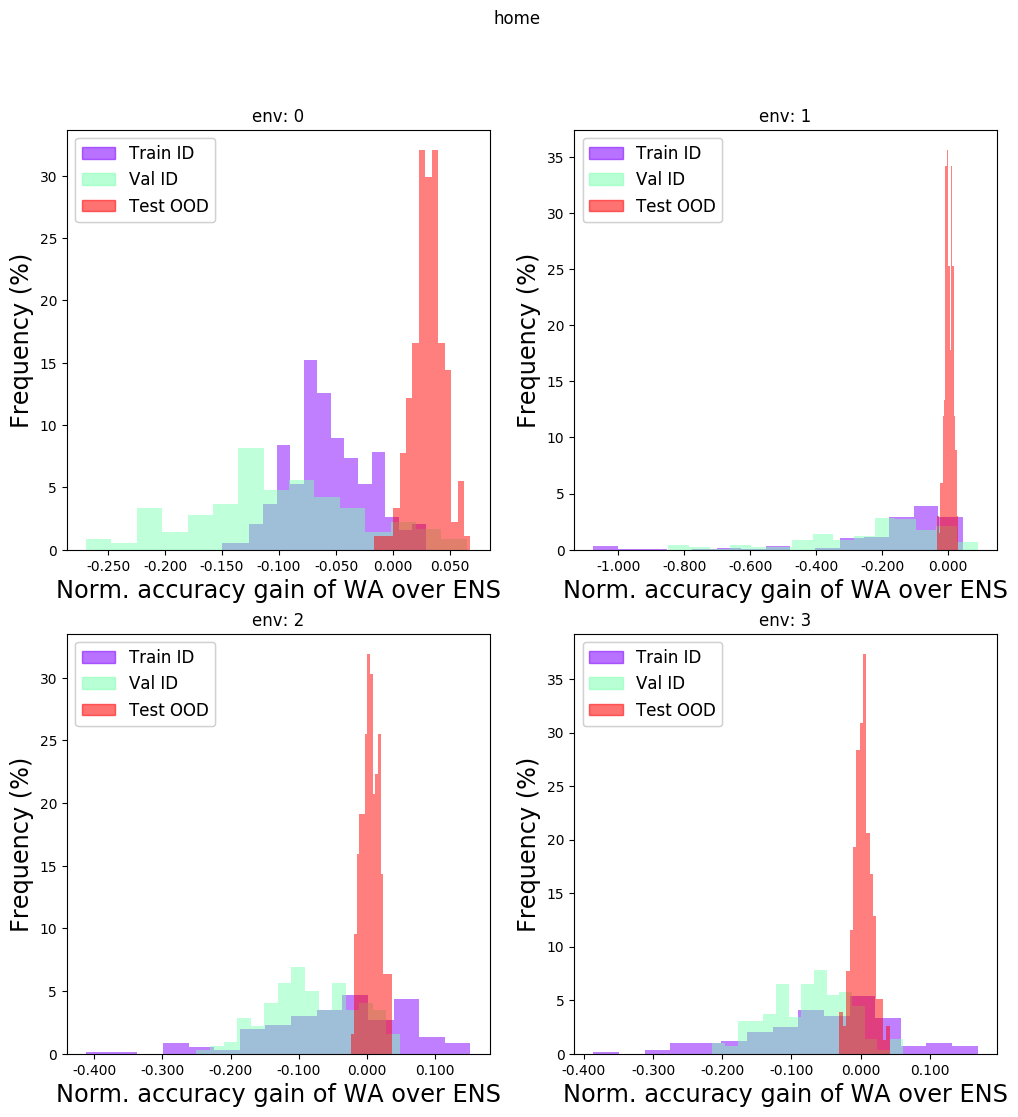

In [52]:
list_markers = ["*", "o", "v", "^", "<", ">", ".", ",", "1", "2", "3", "4"]
plt.rcParams["figure.figsize"] = (12, 12)



plot.dict_key_to_label.update(
    {
        "acc-acc_ens":  "Accuracy gain of WA over ENS",
        "acc-acc_ens/1-acc_ens": "Norm. accuracy gain of WA over ENS",
    }
)

plot.FORMAT_X=3

dataset="home"

fig, axes = plt.subplots(2, 2)
for test_env in [0, 1, 2, 3]:
    # ax1 = axes[test_env % 2][test_env // 2]
    # plot.plot_basic_scatter(
    #     all_best.d[dataset],
    #     ax1=ax1,
    #     title="env: " + str(test_env),
    #     # keycolor="lengthf",
    #     markers=list_markers,
    #     key_x="lengthf",
    #     keys_y=["trainin_acc-trainin_acc_ens", "train_acc-train_acc_ens", "acc-acc_ens"],
    #     # colors=list_colormaps,
    #     loc="best" if test_env == 3 else "no",
    #     lambda_filtering=lambda x: x["testenv"] == test_env,
    #     kwargs={
    #         "alpha": 0.4,
    #         "s": 40
    #     }
    # )
    plot.plot_histogram_keys(
        [x for x in all_best.d[dataset] if x["testenv"] == test_env],
        list_keys=[
            "trainin_acc-trainin_acc_ens/1-trainin_acc_ens",
            "train_acc-train_acc_ens/1-train_acc_ens",
            "acc-acc_ens/1-acc_ens"
        ],
        labels=[
            "Train ID",
            "Val ID",
            "Test OOD"],
        loc="best",
        ax1=axes[test_env // 2][test_env % 2],
        # limits={"freq": [0, 100]},
        title="env: " + str(test_env),
    )

plt.suptitle(dataset)
fig.show()

In [6]:
MIN_STEP=-1000
MAX_STEP=15001
def plot_keys(ll, label, title=None, with_stats=False, ax=None, colormap=cm.rainbow, kwargs={}, key_x="val_acc", key_y="test_acc", keyclustering=None):
    if keyclustering is not None:
        ll = plot.lambda_clustering(ll, keyclustering)
    values_x = plot.get_x(ll, key_x)
    values_y = plot.get_x(ll, key_y)    

    colormap = colormap(np.linspace(0, 1, MAX_STEP-MIN_STEP))
    color = [colormap[l["step"]-MIN_STEP] for l in ll]
    if ax is None:
        fig, ax = plt.subplots()
        if title:
            ax.set_title(title, fontsize="large")

    ax.scatter(values_x, values_y, color=color, label=label, **kwargs)
    ax.set_xlabel(key_x, fontsize="large")
    ax.set_ylabel(key_y, fontsize="large")


In [ ]:
keys = [
    "dn_erm12345_lp12345_0117", "part", "dn_erm1_lp12345_0117", "dn_erm2_lp12345_0117",
    "dn_erm3_lp12345_0117", "dn_erm4_lp12345_0117", "dn_erm5_lp12345_0117"
]
dict_key_to_label={
    # "joindiwa": "joindiwa",
    "dn_erm12345_lp12345_0117": "all",
    "part": "wa of spe",
    "dn_erm1_lp12345_0117": "spe 1",
    "dn_erm2_lp12345_0117": "spe 2",
    "dn_erm3_lp12345_0117": "spe 3",
    "dn_erm4_lp12345_0117": "spe 4",
    "dn_erm5_lp12345_0117": "spe 5",       
}

In [ ]:
list_colormaps = [cm.Reds, cm.Oranges, cm.Greens, cm.Blues, cm.Purples, yellow_cmp, cm.Greys]
list_markers = ["*", "o", "v", "^", "<", ">", ".", ",", "1", "2", "3", "4"]
plt.rcParams["figure.figsize"] = (12, 18)
dict_out = collections.defaultdict(list)

ldn = dict(ldn_inf, **ldn_0117)
fig, axes = plt.subplots(3, 2)
for test_env in [0, 1, 2, 3, 4, 5]:
    ax = axes[test_env % 3][test_env // 3]
    # keys = sorted(ldn.keys(), reverse=1)    
    for i, approach in list(enumerate(keys)):
        ll = [line for line in ldn[approach] if line["step"] != "best" and line["step"] > 100]
        plot_keys(
            ll,
            label=dict_key_to_label[approach],
            ax=ax,
            title=None,
            key_x="step",
            key_y="env" + str(test_env) + "_in_acc",
            colormap=list_colormaps[i%len(list_colormaps)],
            kwargs={"marker": list_markers[i%len(list_markers)]},
            keyclustering="step"
        )
    # ax.set_title(f"Domain {test_env}")
    if test_env == 5 or True:
        ax.legend(loc="lower right")
# fig.suptitle(f"Correlation for ERM on DomainNet")
fig.show()

In [ ]:
list_colormaps = [cm.Reds, cm.Oranges, cm.Greens, cm.Blues, cm.Purples, yellow_cmp, cm.Greys]
list_markers = ["*", "o", "v", "^", "<", ">", "."]
plt.rcParams["figure.figsize"] = (12, 18)
dict_out = collections.defaultdict(list)

fig, axes = plt.subplots(3, 2)
for test_env in [0, 1, 2, 3, 4, 5]:
    ax = axes[test_env %3][test_env // 3]
    for i, approach in enumerate(sorted(ldn_0117.keys())):
        ll = [line for line in ldn_0117[approach] if line["step"] > 100]
        plot_keys(
            ll,
            label=approach,
            ax=ax,
            key_x="step",
            key_y="env" + str(test_env) + "_out_acc",
            colormap=list_colormaps[i],
            kwargs={"marker": list_markers[i]},
            keyclustering="step"
        )
    ax.set_title(f"Domain {test_env}")
    if test_env == 5 or True:
        ax.legend(loc="lower right")
# fig.suptitle(f"Correlation for ERM on DomainNet")
fig.show()

In [ ]:

l = lhome0123
keys = l.keys()
dict_out = collections.defaultdict(list)


for test_env in [0, 1, 2, 3]:
    keys = sorted([key for key in l.keys() if key.startswith("home_") or key.startswith(f"home{test_env}_")])
    colormap = cm.rainbow(np.linspace(0, 1, len(keys)))
    fig, ax = plt.subplots()
    for i, key in enumerate(keys):
        shortkey = "_".join([c for c in key.split("_")[2:] if c not in ["lp", "0926"]])
        ll = [line for line in l[key] if line.get("test_env", test_env) == test_env and line["step"] > 4000]
        if len(ll) ==0:
            print(f"Skip {shortkey} for test_env {test_env}")
        else:
            plot_slopes_c(ll, label=shortkey, ax=ax, color=colormap[i])
    plt.title(f"IID-OOD correlation for ERM on OfficeHome domain {test_env}")
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
from collections import defaultdict
dict_out = defaultdict(list)
for test_env in [0]:
    plt.show()
    print(test_env)
    for key in sorted(l.keys(), key=lambda x:x.split("_dn")[1].split("_")):
        if "lpl4w0a_i" in key or "lpl4w0_i" in key:
            if key.startswith("terra" + str(test_env)):
                plt.show()
                print(key)
                short_key = "_".join(key.split("_")[1:])
                dict_out[short_key].append(plot_slopes_c(l[key], label=key))

In [ ]:
from oodiidacc import dn_0117_v2

In [ ]:
fig_dr = plot.plot_key(
    dn_0117_v2.l,
    labels=["Part"],    
    key1="step",
    key2="acc",
    order=0,
    loc="lower right",
)



In [ ]:
plot.dict_key_to_label = {}
for env in range(0, 5):
    if env == 0:
        keys_y = ["acc", "acc_ens"]
    else:
        keys_y = [f"env_{env}_in_acc", f"env_{env}_in_acc_ens", 
                # f"env_{env}_in_acc_net{env-1}",
                f"env_{env}_out_acc", f"env_{env}_out_acc_ens",
                # f"env_{env}_out_acc_net{env-1}"
                ]        
    fig_dr = plot.plot_basic_scatter(
        dn_0117_v2.l[0],
        key_x="step",
        keys_y=keys_y,
        order=2,
        loc="upper left",
    )